Vamos ver alguns aspectos sobre a inflação acumulada mensal, isto é, de mês a mês. A série histórica começou a ser medida em 1994, com o Plano Real, porém, como tivemos taxas absurdas acima de 40%, preferi contar a partir do ano seguinte. A última taxa divulgada foi de abril, então só temos 4 dados desse ano.

### Importando as bibliotecas



In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import numpy as np
import statsmodels.formula.api as smf

### Lendo o arquivo CSV

In [108]:
df=pd.read_csv('inflacao.csv')

### Convertendo as datas e números

In [109]:
df['data']=pd.to_datetime(df['data'])
df['inflacao']=pd.to_numeric(df['inflacao'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      354 non-null    datetime64[ns]
 1   inflacao  354 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.7 KB


### Adicionando uma coluna com os meses e anos

In [110]:
df['ano'] = df['data'].dt.to_period('Y')
df.head()

,data,inflacao,ano
0,1995-01-01,1.70,1995
1,1995-02-01,1.02,1995
2,1995-03-01,1.55,1995
3,1995-04-01,2.43,1995
4,1995-05-01,2.67,1995


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      354 non-null    datetime64[ns]
 1   inflacao  354 non-null    float64       
 2   ano       354 non-null    period[A-DEC] 
dtypes: datetime64[ns](1), float64(1), period[A-DEC](1)
memory usage: 8.4 KB


### Estatísticas descritivas

In [112]:
df.describe()

,data,inflacao
count,354,354.000000
mean,2009-09-15 15:15:15.254237184,0.545254
min,1995-01-01 00:00:00,-0.680000
25%,2002-05-08 18:00:00,0.260000
50%,2009-09-16 00:00:00,0.470000
75%,2017-01-24 06:00:00,0.740000
max,2024-06-01 00:00:00,3.020000
std,NaN,0.464396


In [113]:
media=(df['inflacao'].mean()).round(2)
min=(df['inflacao'].min()).round(2)
max=(df['inflacao'].max()).round(2)
desv_pad=(df['inflacao'].std()).round(2)
mediana=(df['inflacao'].median()).round(2)
moda=(df['inflacao'].mode()).round(2)

In [114]:
moda1=moda[0]
moda2=moda[1]

In [115]:
df.sort_values(by='inflacao')

,data,inflacao,ano
330,2022-07-01,-0.68,2022
43,1998-08-01,-0.51,1998
304,2020-05-01,-0.38,2020
331,2022-08-01,-0.36,2022
303,2020-04-01,-0.31,2020
...,...,...,...
5,1995-06-01,2.26,1995
6,1995-07-01,2.36,1995
3,1995-04-01,2.43,1995
4,1995-05-01,2.67,1995


In [116]:
print(f'A média da inflação acumulada é de {media}%, enquanto o mínimo é de {min}% em julho de 2022 e o máximo, {max}% em novembro de 2002.')

A média da inflação acumulada é de 0.55%, enquanto o mínimo é de -0.68% em julho de 2022 e o máximo, 3.02% em novembro de 2002.


### Frequência dos valores

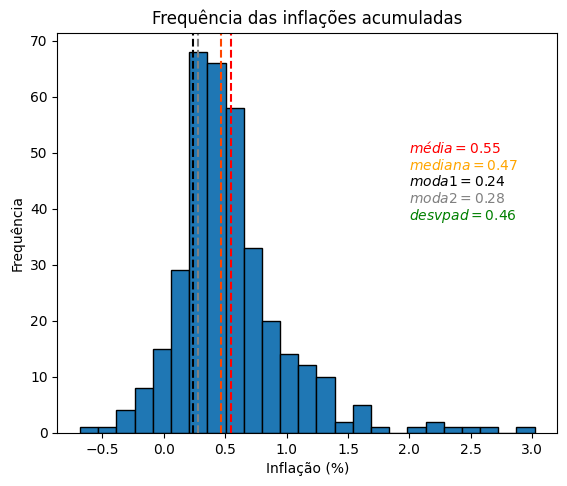

In [117]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
mu, med, desv, moda = media, mediana, desv_pad, moda

eixo.hist(df['inflacao'],bins=25,edgecolor='black')
eixo.set_xlabel('Inflação (%)')
eixo.set_ylabel('Frequência')
eixo.set_title('Frequência das inflações acumuladas')

eixo.annotate('$média = {0:.2f}$'.format(mu),
               xy=(2.0, 50), fontsize=10, color='red')
eixo.annotate('$mediana = {0:.2f}$'.format(med),
               xy=(2.0, 47), fontsize=10, color='orange')
eixo.annotate('$moda1 = {0:.2f}$'.format(moda1),
               xy=(2.0, 44), fontsize=10, color='black')
eixo.annotate('$moda2 = {0:.2f}$'.format(moda2),
               xy=(2.0, 41), fontsize=10,color='gray')
eixo.annotate('$desvpad = {0:.2f}$'.format(desv),
               xy=(2.0, 38), fontsize=10,color='green')

eixo.axvline(mu, color = 'red', linestyle='--')
eixo.axvline(med, color='orangered', linestyle='--')
eixo.axvline(moda1, color='black', linestyle='--')
eixo.axvline(moda2, color='gray', linestyle='--')

plt.show()

### Série histórica

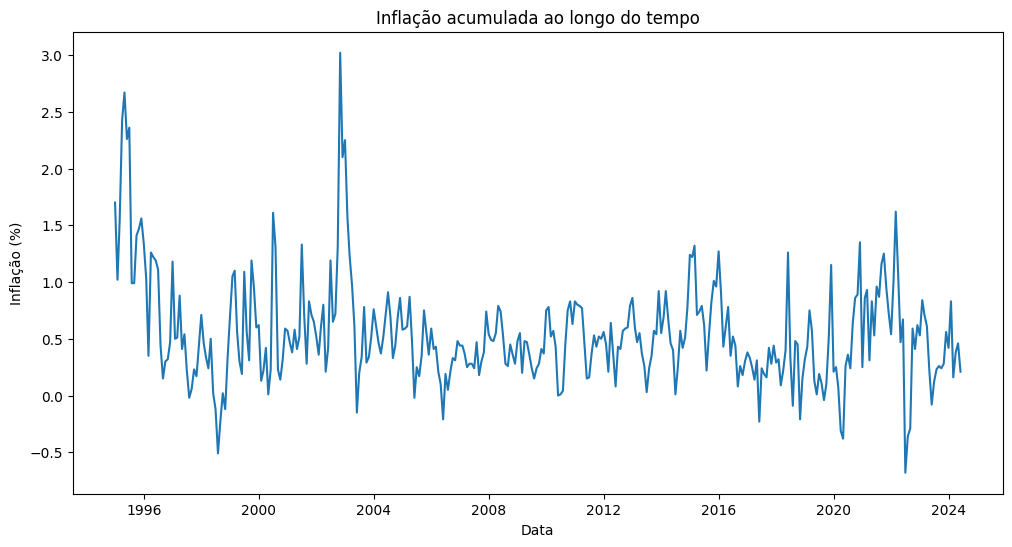

In [118]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='data', y='inflacao')
plt.title('Inflação acumulada ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Inflação (%)')
plt.show()

<Axes: xlabel='data_numeric', ylabel='inflacao'>

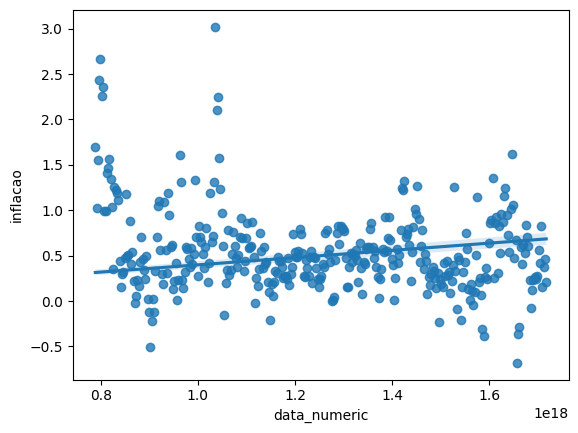

In [119]:
df['data_numeric'] = pd.to_numeric(pd.to_datetime(df['data']))
sns.regplot(data=df, x='data_numeric', y='inflacao')

In [120]:
modelo = smf.ols(formula='data_numeric ~ inflacao', data=df).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           data_numeric   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     20.03
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.03e-05
Time:                        15:18:42   Log-Likelihood:                -14699.
No. Observations:                 354   AIC:                         2.940e+04
Df Residuals:                     352   BIC:                         2.941e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.326e+18   2.15e+16     61.673      0.0

### Série histórica anual

In [121]:
media_ano = ((df.groupby('ano')['inflacao'].mean()).round(2)).reset_index()
media_ano['ano'] = pd.to_numeric(media_ano['ano'].astype(str))
media_ano['inflacao'] = pd.to_numeric(media_ano['inflacao'])
media_ano.head()

,ano,inflacao
0,1995,1.70
1,1996,0.76
2,1997,0.43
3,1998,0.14
4,1999,0.72


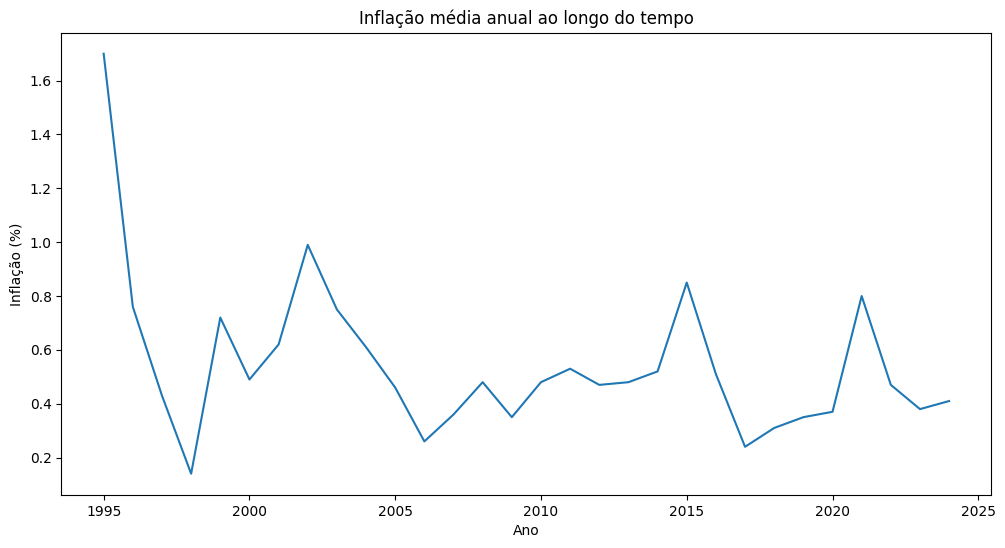

In [122]:
plt.figure(figsize=(12,6))
sns.lineplot(data=media_ano, x='ano', y='inflacao')
plt.title('Inflação média anual ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('Inflação (%)')
plt.show()

# Prevendo o futuro

### Criação do modelo de previsão com o *Prophet*

In [123]:
df_prophet = df[['data', 'inflacao']].rename(columns={'data': 'ds', 'inflacao': 'y'})
df_prophet.head()

,ds,y
0,1995-01-01,1.70
1,1995-02-01,1.02
2,1995-03-01,1.55
3,1995-04-01,2.43
4,1995-05-01,2.67


In [124]:
np.random.seed(2508)

modelo = Prophet()
modelo.fit(df_prophet)

futuro = modelo.make_future_dataframe(periods=19, freq='M')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdl2oyeu0/r5za2jqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdl2oyeu0/wcp9x92u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67237', 'data', 'file=/tmp/tmpdl2oyeu0/r5za2jqg.json', 'init=/tmp/tmpdl2oyeu0/wcp9x92u.json', 'output', 'file=/tmp/tmpdl2oyeu0/prophet_model0yg0_k7r/prophet_model-20240710151842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


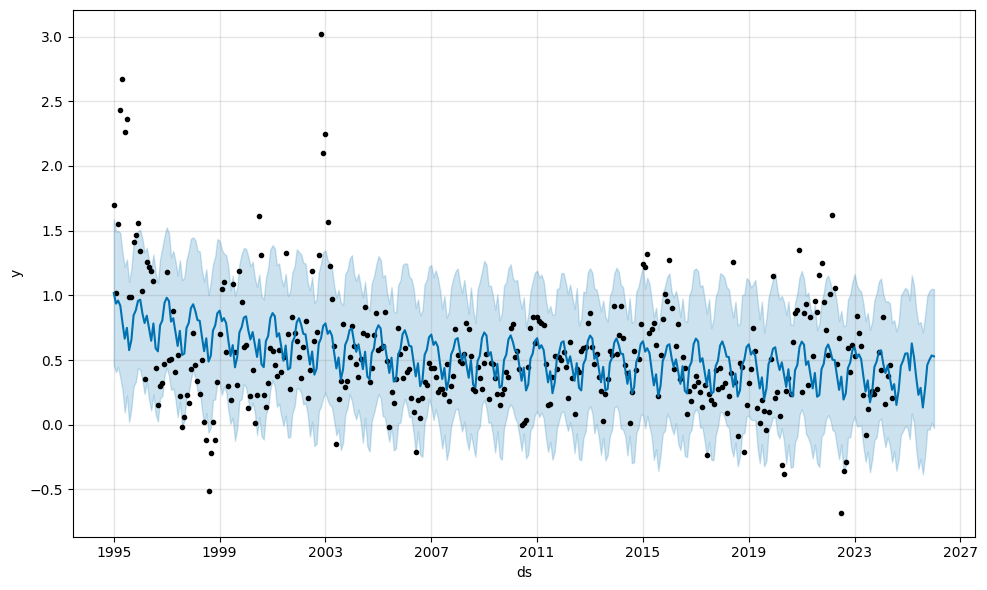

In [125]:
fig1 = modelo.plot(previsao)

In [126]:
from prophet.plot import plot_plotly
fig = plot_plotly(modelo, previsao)
fig.update_layout(
    width=1000, height=500,
    xaxis={'tickangle': -45},
    font_family='Arial',
    font_size=14,
    font_color='grey',
    title_font_color='black',
    title_font_size=22,
    xaxis_title='Ano',
    yaxis_title='Taxa de inflação (%)',
    title='Taxa mensal de inflação acumulada de 1995 a abril de 2024')
fig.show()

In [127]:
fig.write_html('inflacao.html')

### Intervalos de confiança do modelo

In [128]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1995-01-01,1.018163,0.457689,1.588200
1,1995-02-01,0.936031,0.406997,1.492145
2,1995-03-01,0.959707,0.447465,1.498749
3,1995-04-01,0.920280,0.363915,1.483135
4,1995-05-01,0.788879,0.271789,1.327326
...,...,...,...,...
368,2025-08-31,0.282294,-0.241964,0.844758
369,2025-09-30,0.462348,-0.033945,0.994641
370,2025-10-31,0.503183,-0.037995,1.035542
371,2025-11-30,0.535622,0.015373,1.050521


### Componentes do modelo

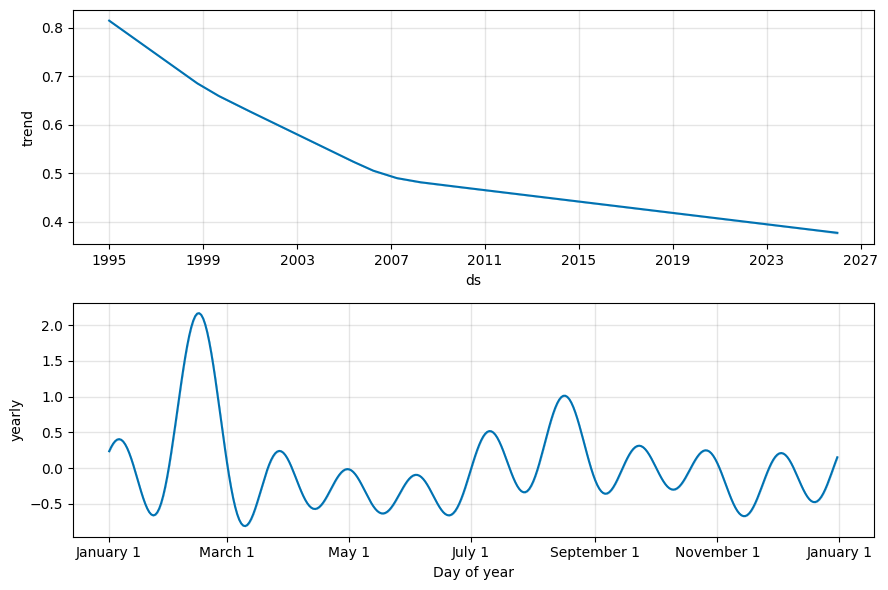

In [129]:
fig2 = modelo.plot_components(previsao)

# Treino e teste

### Separando os dados


In [130]:
df_prophet.shape

(354, 2)

In [131]:
df_treino = pd.DataFrame()

# Separando 80% dos dados para treino
df_treino['ds'] = df_prophet['ds'][:282]
df_treino['y'] = df_prophet['y'][:282]

In [132]:
df_teste = pd.DataFrame()

# Separando 20% dos dados para teste
df_teste['ds'] = df_prophet['ds'][282:]
df_teste['y'] = df_prophet['y'][282:]

In [133]:
np.random.seed(2508)

modelo2 = Prophet()
modelo2.fit(df_treino)
futuro = modelo2.make_future_dataframe(periods=91, freq='M')
previsao2 = modelo2.predict(futuro)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdl2oyeu0/jxjwqxzv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdl2oyeu0/aluaq0n3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69980', 'data', 'file=/tmp/tmpdl2oyeu0/jxjwqxzv.json', 'init=/tmp/tmpdl2oyeu0/aluaq0n3.json', 'output', 'file=/tmp/tmpdl2oyeu0/prophet_modelg6sy1b5z/prophet_model-20240710151844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


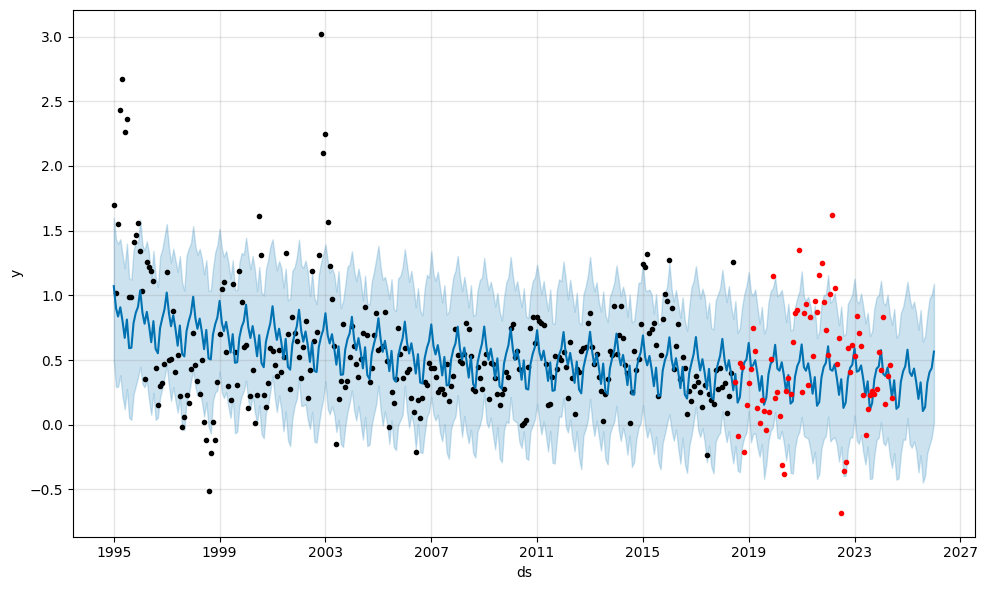

In [134]:
fig1 = modelo2.plot(previsao2)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

In [135]:
fig = plot_plotly(modelo2, previsao2)
fig.update_layout(
    width=1000, height=500,
    xaxis={'tickangle': -45},
    font_family='Arial',
    font_size=14,
    font_color='grey',
    title_font_color='black',
    title_font_size=22,
    xaxis_title='Ano',
    yaxis_title='Taxa de inflação (%)',
    title='Taxa mensal de inflação acumulada de 1995 a abril de 2024')
fig.show()

In [136]:
fig.write_html('inflacao2.html')

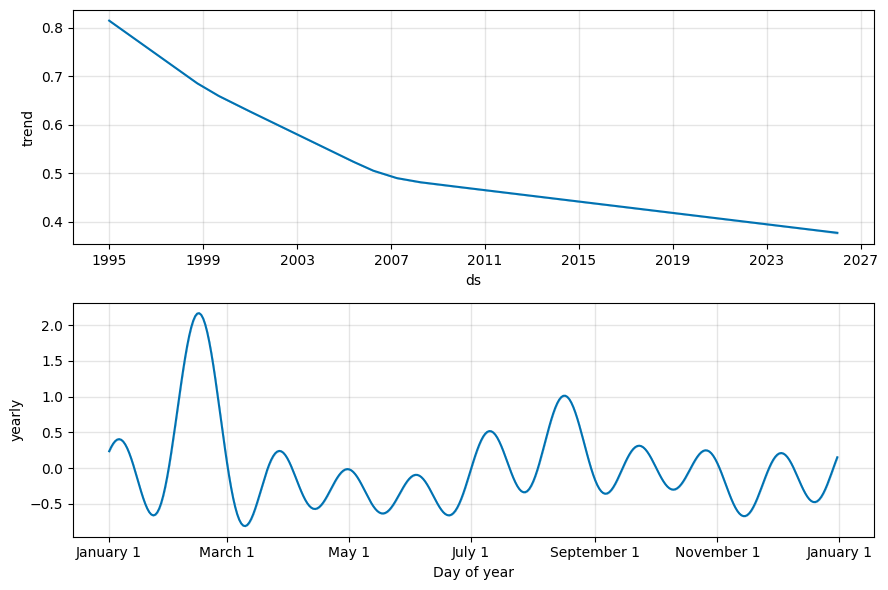

In [137]:
fig2 = modelo.plot_components(previsao)